# <span style="color:red">Rocket League Championship Predictions.</span>

## <span style="color:red">Imports.</span>

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kaggle
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

## <span style="color:red">Downloading the data.</span>

In [2]:
!kaggle datasets download -d dylanmonfret/rlcs-202122 --unzip -p ./data/

Dataset URL: https://www.kaggle.com/datasets/dylanmonfret/rlcs-202122
License(s): CC0-1.0




  0%|          | 0.00/45.6M [00:00<?, ?B/s]
  4%|4         | 2.00M/45.6M [00:00<00:02, 19.0MB/s]
 11%|#         | 5.00M/45.6M [00:00<00:01, 24.1MB/s]
 20%|#9        | 9.00M/45.6M [00:00<00:01, 31.6MB/s]
 31%|###       | 14.0M/45.6M [00:00<00:00, 39.3MB/s]
 44%|####3     | 20.0M/45.6M [00:00<00:00, 43.2MB/s]
 57%|#####6    | 26.0M/45.6M [00:00<00:00, 48.2MB/s]
 70%|#######   | 32.0M/45.6M [00:00<00:00, 49.9MB/s]
 83%|########3 | 38.0M/45.6M [00:00<00:00, 50.9MB/s]
 96%|#########6| 44.0M/45.6M [00:01<00:00, 51.4MB/s]
100%|##########| 45.6M/45.6M [00:01<00:00, 45.4MB/s]


## <span style="color:red">Reading in the Data.</span>

In [3]:
df = pd.read_csv('./data/games_by_teams.csv')

## <span style="color:red">Understanding the data.</span>

In [4]:
df.head()

,game_id,color,team_id,team_slug,team_name,team_region,ball_possession_time,ball_time_in_side,core_shots,core_goals,...,positioning_time_defensive_third,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,winner
0,616004f3143c37878b238690,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,136.54,170.84,13,2,...,513.73,291.06,189.48,660.06,334.20,727.07,267.20,1.0,3.0,True
1,616004f3143c37878b238690,orange,614c8930f8090ec745286474,https://octane.gg/teams/6474-ranga-roundup,RANGA ROUNDUP,Oceania,153.60,148.51,4,1,...,457.04,329.25,214.03,633.39,366.93,740.69,259.64,3.0,1.0,False
2,616004f7143c37878b238697,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,155.79,145.60,10,4,...,507.95,308.51,264.92,659.74,421.65,780.01,301.38,5.0,1.0,True
3,616004f7143c37878b238697,orange,614c8930f8090ec745286474,https://octane.gg/teams/6474-ranga-roundup,RANGA ROUNDUP,Oceania,126.81,185.78,6,2,...,561.51,360.96,147.48,762.21,307.73,782.32,287.61,1.0,5.0,False
4,616004fc143c37878b23869e,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,165.76,136.11,11,3,...,476.66,373.66,279.05,648.19,481.20,832.70,296.69,0.0,3.0,True


In [5]:
df.dtypes

game_id                                object
color                                  object
team_id                                object
team_slug                              object
team_name                              object
team_region                            object
ball_possession_time                  float64
ball_time_in_side                     float64
core_shots                              int64
core_goals                              int64
core_saves                              int64
core_assists                            int64
core_score                              int64
core_shooting_percentage              float64
boost_bpm                             float64
boost_bcpm                            float64
boost_avg_amount                      float64
boost_amount_collected                float64
boost_amount_stolen                   float64
boost_amount_collected_big            float64
boost_amount_stolen_big               float64
boost_amount_collected_small      

In [6]:
null_counts = df.isnull().sum()
print(null_counts)

game_id                                 0
color                                   0
team_id                                 0
team_slug                               0
team_name                               0
team_region                            39
ball_possession_time                  596
ball_time_in_side                     596
core_shots                              0
core_goals                              0
core_saves                              0
core_assists                            0
core_score                              0
core_shooting_percentage                0
boost_bpm                             370
boost_bcpm                            370
boost_avg_amount                      370
boost_amount_collected                370
boost_amount_stolen                   370
boost_amount_collected_big            370
boost_amount_stolen_big               370
boost_amount_collected_small          370
boost_amount_stolen_small             370
boost_count_collected_big         

## <span style="color:red">Sorting the Data/Cleaning the Data.</span>

In [7]:
columns_to_drop = ['ball_possession_time','ball_time_in_side','boost_bpm','boost_bcpm','boost_avg_amount','boost_amount_collected','boost_amount_stolen','boost_amount_collected_big','boost_amount_stolen_big','boost_amount_collected_small','boost_amount_stolen_small','boost_count_collected_big','boost_count_collected_small','boost_count_stolen_big','boost_count_stolen_small','boost_amount_overfill','boost_amount_overfill_stolen','boost_amount_used_while_supersonic','boost_time_zero_boost','boost_time_full_boost','boost_time_boost_0_25','boost_time_boost_25_50','boost_time_boost_50_75','boost_time_boost_75_100','movement_total_distance','movement_time_supersonic_speed','movement_time_boost_speed','movement_time_slow_speed','movement_time_ground','movement_time_low_air','movement_time_high_air','movement_time_powerslide','movement_count_powerslide','positioning_time_defensive_third','positioning_time_neutral_third','positioning_time_offensive_third','positioning_time_defensive_half','positioning_time_offensive_half','positioning_time_behind_ball','positioning_time_in_front_ball','demo_inflicted','demo_taken']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [8]:
df.fillna({"team_region":'Not Provided'},inplace=True)

In [9]:
#I can not compare the id to anything it is just a place holder.
df.drop('game_id', axis=1, inplace=True)

In [10]:
#The Team ID is also just a place holder.
df.drop('team_id', axis=1, inplace=True)

In [11]:
#Not going to be used in any EDA
df.drop('team_slug', axis=1, inplace=True)

In [12]:
pd.set_option('future.no_silent_downcasting', True)

In [13]:
df.to_csv('cleaned_RLC_data.csv', index = False)

In [14]:
#Used for easy copy pasting
#['color','team_name','team_region','ball_possesion_time','ball_time_in_side','core_shots','core_goals','core_saves','core_assists','core_score','core_shooting_percentage','boost_bpm','boost_bcpm','boost_avg_amount','boost_amount_collected','boost_count_collected','boost_amount_stolen','boost_amount_collected_big','boost_amount_stolen_big','boost_amount_collected_small','boost_amount_stolen_small','boost_count_collected_big','boost_count_collected_small','boost_count_stolen_big','boost_count_stolen_small','boost_amount_overfill','boost_amount_overfill_stolen','boost_amount_used_while_supersonic','boost_time_zero_boost','boost_time_full_boost','boost_time_boost_0_25','boost_time_boost_25_50','boost_time_boost_50_75','boost_time_boost_75_100','movement_total_distance','movement_time_supersonic_speed','movement_time_boost_speed','movement_time_slow_speed','movement_time_ground','movement_time_low_air','movement_time_high_air','movement_time_powerslide','movement_count_powerslide','positioning_time_defensive_third','positioning_time_neutral_third','positioning_time_offensive_third','positioning_time_defensive_half','positioning_time_offensive_half','positioning_time_behind_ball','positioning_time_in_front_ball','demo_inflicted','demo_taken','boost_count_collected','winner']

In [15]:
df.dtypes

color                        object
team_name                    object
team_region                  object
core_shots                    int64
core_goals                    int64
core_saves                    int64
core_assists                  int64
core_score                    int64
core_shooting_percentage    float64
winner                         bool
dtype: object

## <span style="color:red">Data Visualizations.</span>

### <span style="color:green">Correlations.</span>

In [16]:
corr=df.corr(numeric_only=True)
corr

,core_shots,core_goals,core_saves,core_assists,core_score,core_shooting_percentage,winner
core_shots,1.000000,0.506328,-0.074804,0.479172,0.527447,-0.040282,0.375770
core_goals,0.506328,1.000000,-0.119047,0.889299,0.722726,0.737181,0.619892
core_saves,-0.074804,-0.119047,1.000000,-0.106532,0.488459,-0.036608,-0.070169
core_assists,0.479172,0.889299,-0.106532,1.000000,0.695246,0.634654,0.550422
core_score,0.527447,0.722726,0.488459,0.695246,1.000000,0.479151,0.481233
core_shooting_percentage,-0.040282,0.737181,-0.036608,0.634654,0.479151,1.000000,0.459497
winner,0.375770,0.619892,-0.070169,0.550422,0.481233,0.459497,1.000000


<Axes: >

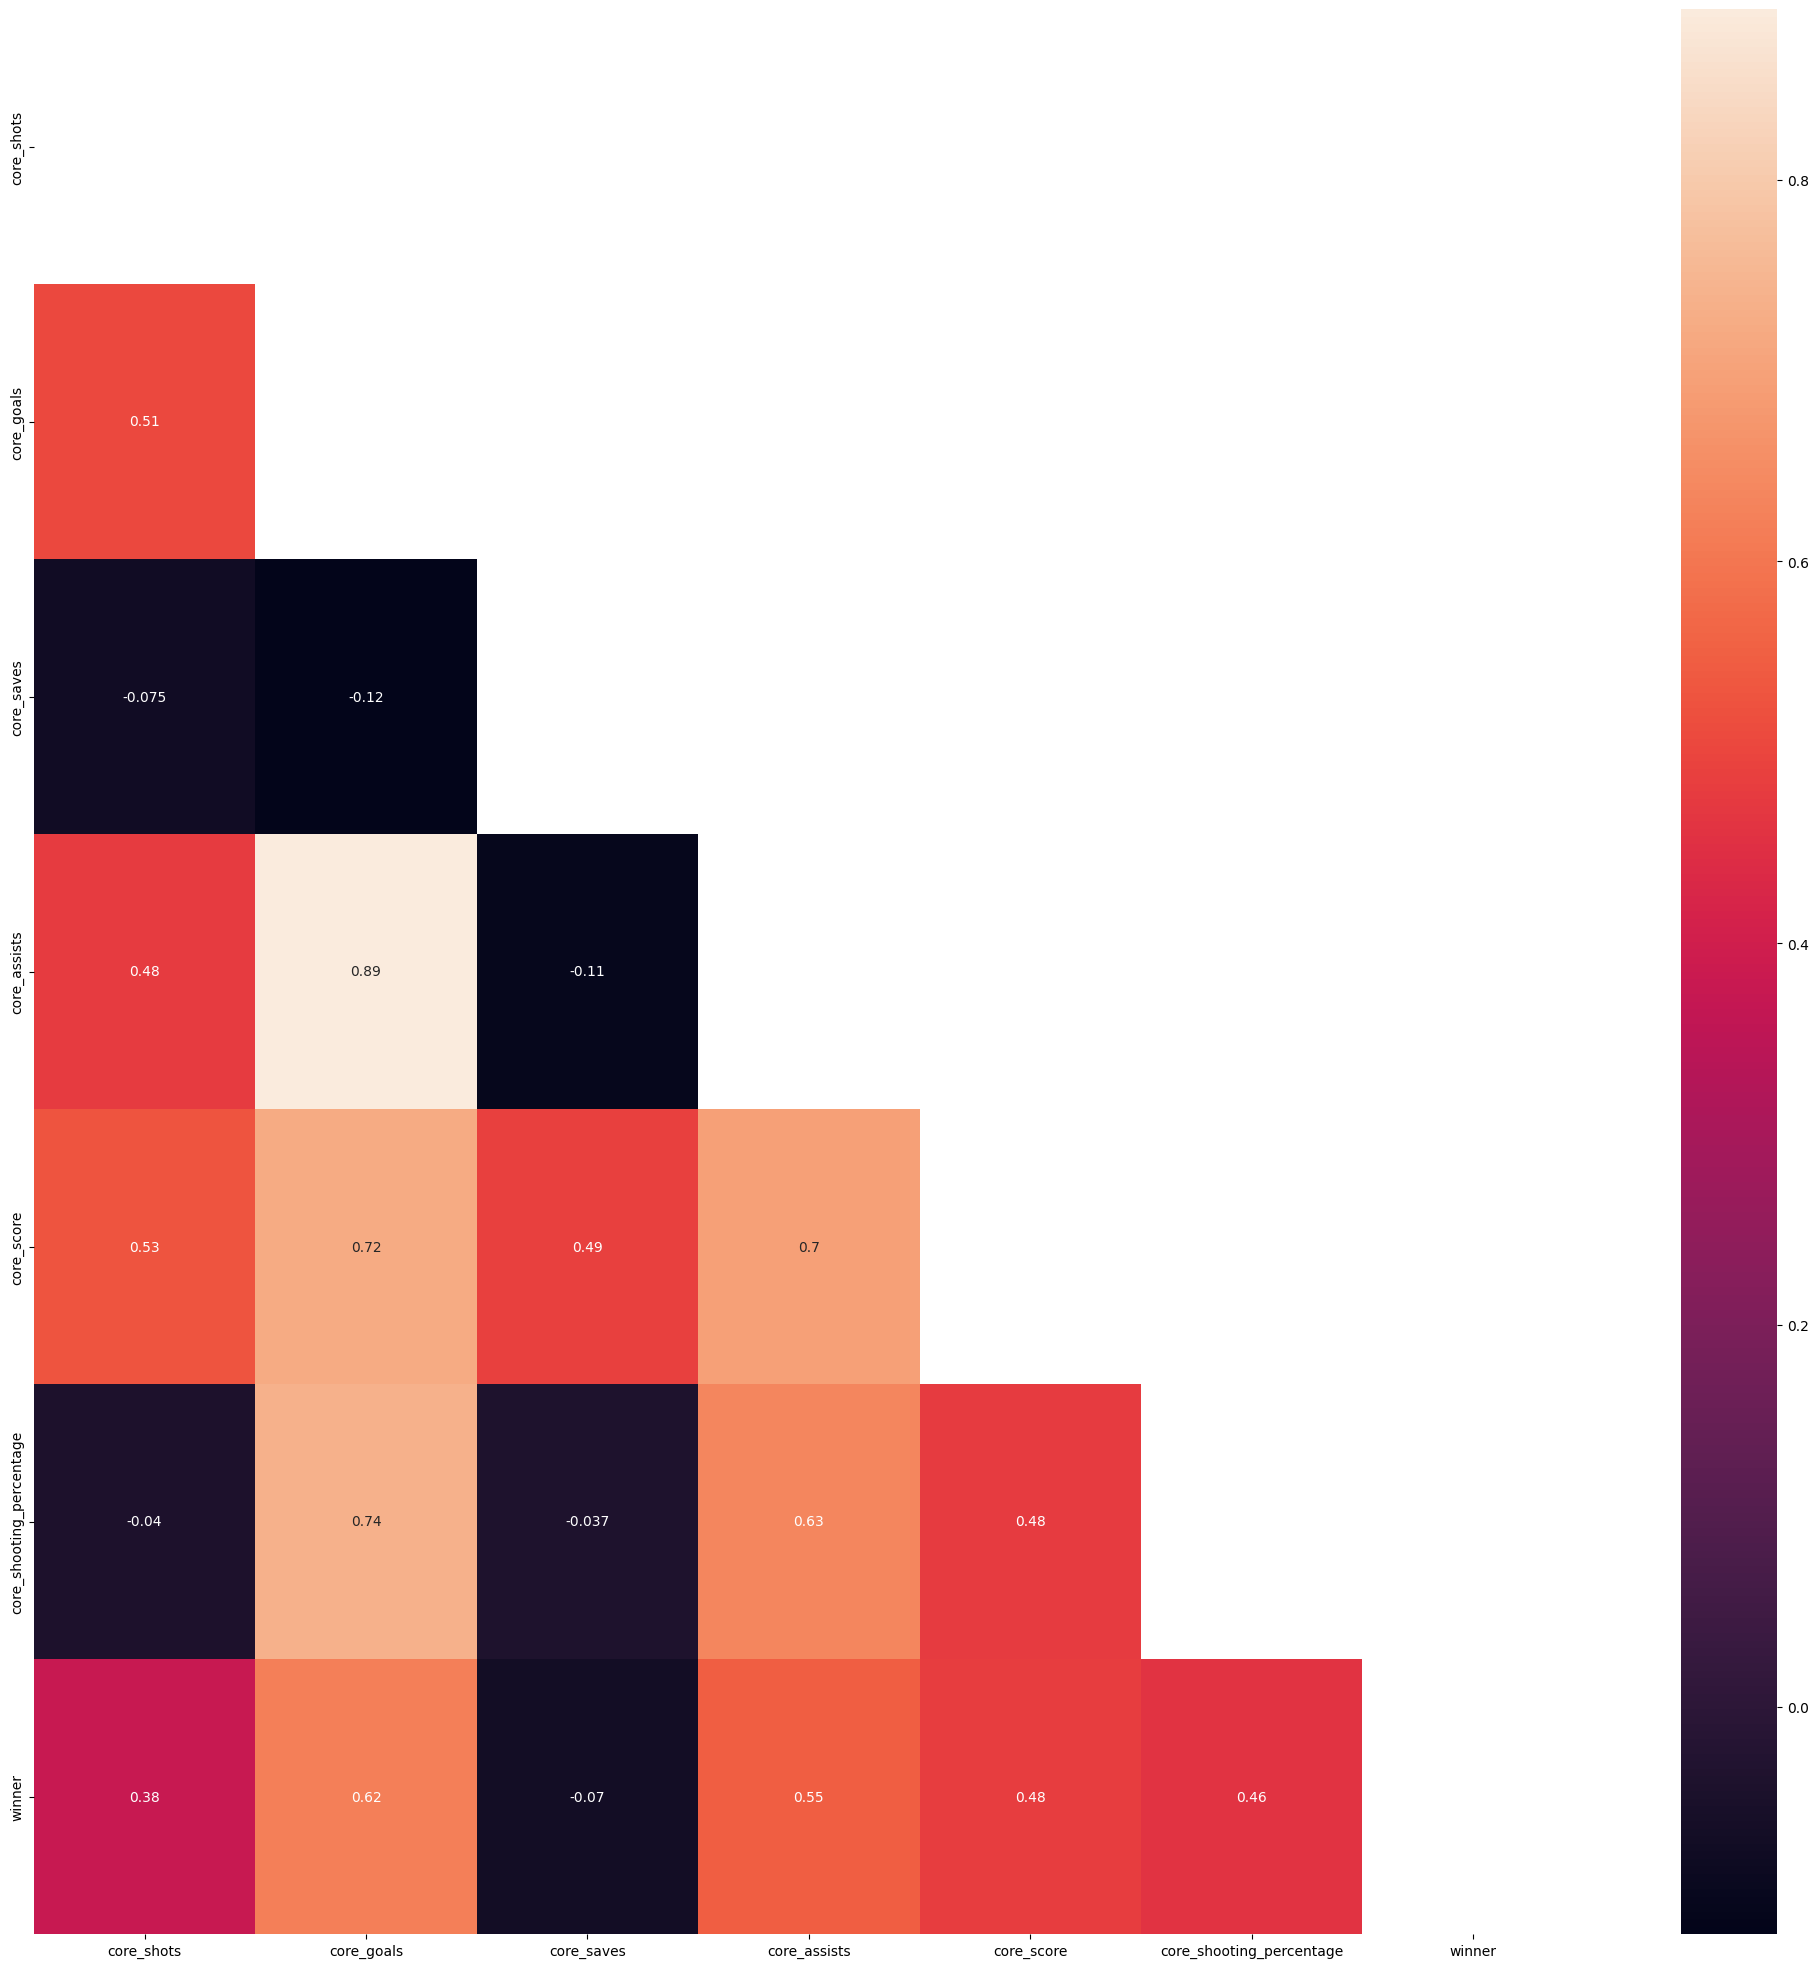

In [17]:
plt.figure(figsize=(25, 25))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True,mask=matrix)

<Axes: >

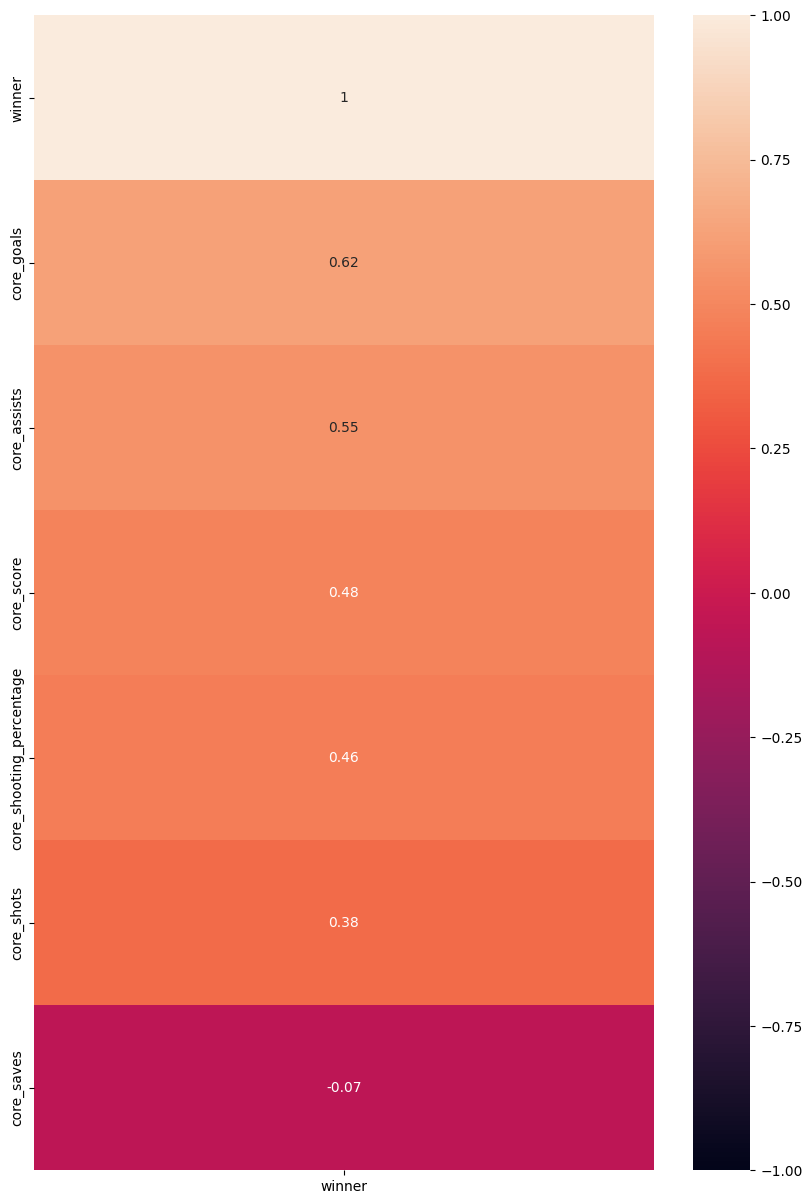

In [18]:
plt.figure(figsize=(10, 15))
sns.heatmap(df.corr(numeric_only=True)[['winner']].sort_values(by = 'winner', ascending = False),
            vmax=1,
            vmin=-1,
            annot = True)

### <span style="color:green">Countplots.</span>

Text(0.5, 1.0, 'Number of each color of team')

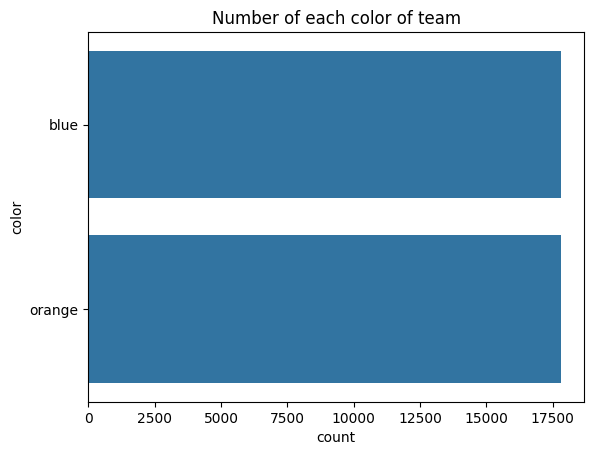

In [19]:
#creating the countplot
sns.countplot(data=df,
             y='color')
plt.title("Number of each color of team")

>This Countplot shows that there are an even number of times that a team is orange or blue.


Text(0.5, 1.0, 'Number of wins and losses')

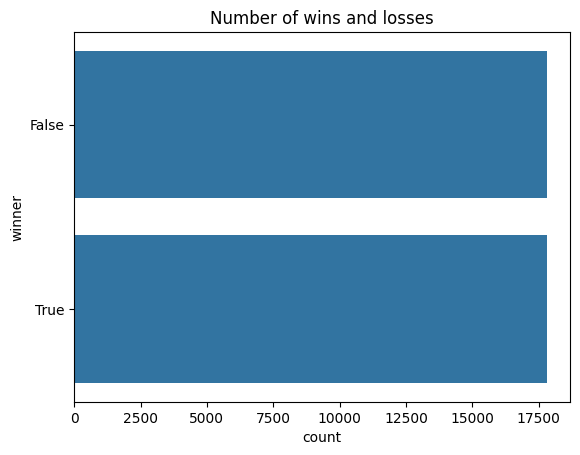

In [20]:
#creating the countplot
sns.countplot(data=df,
             y='winner')
plt.title("Number of wins and losses")

>This Countplot shows that there are an even amount of teams that lost and won.

### <span style="color:green">Histograms.</span>

Text(0.5, 1.0, 'Team Score by Win or Loss')

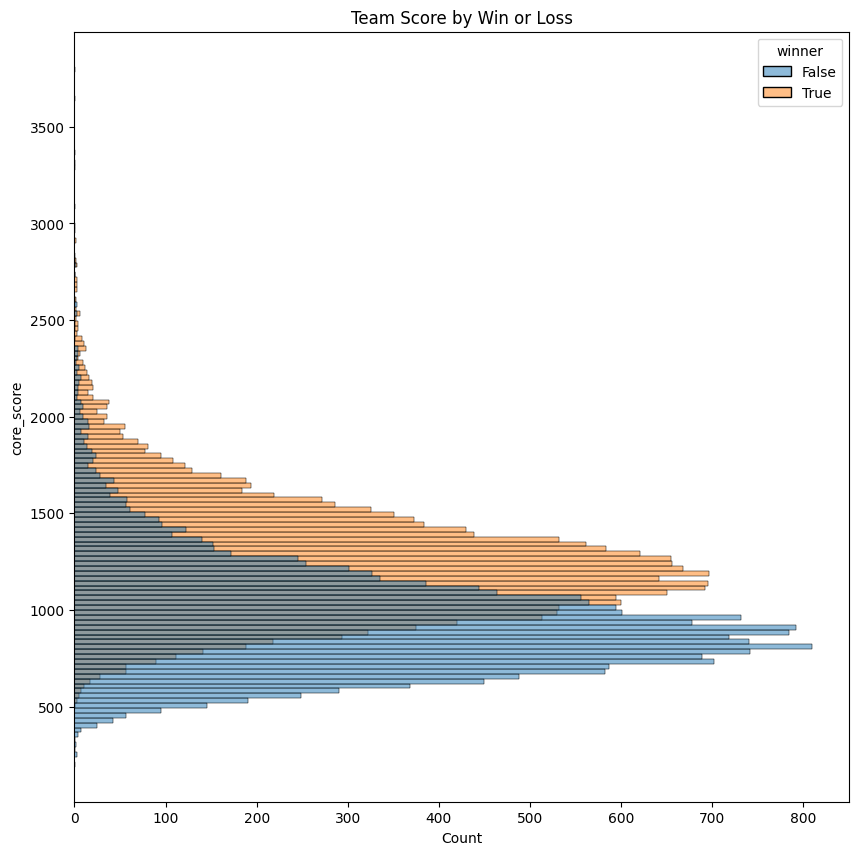

In [40]:
#creating the Histogram
sns.histplot(data=df,
             y='core_score',
             hue='winner')
plt.title("Team Score by Win or Loss")

>This Histogram shows that teams with a lower score will lose more than they win.

### <span style="color:green">Scatterplots.</span>

Text(0.5, 1.0, 'Score to Goals')

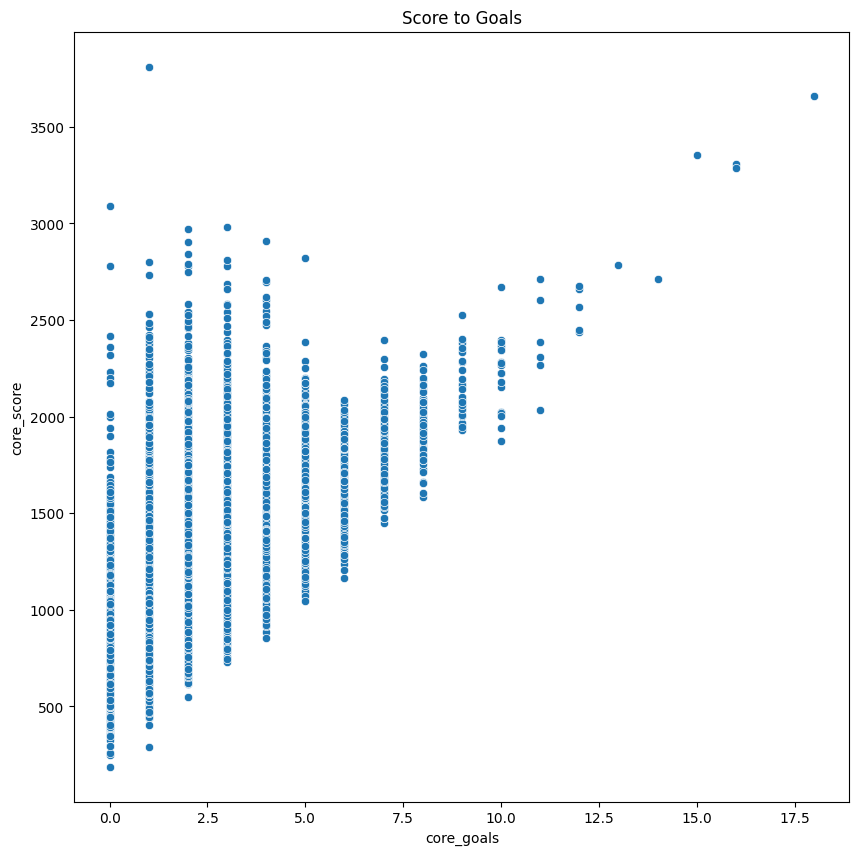

In [39]:
#Setting the figure size
rcParams['figure.figsize'] = 10,10
#making the scatterplot
sns.scatterplot(data=df,
               y='core_score',
               x= 'core_goals')
plt.title("Score to Goals")

>The scatterplot above shows that the more often a team scores then the higher the teams overall score will be. There are other factors that contribute to the teams score as well like assists and shots on net and dont forget about saves goalies are the real heros in a match.(Assists and Saves shown below.)

Text(0.5, 1.0, 'Score to Saves')

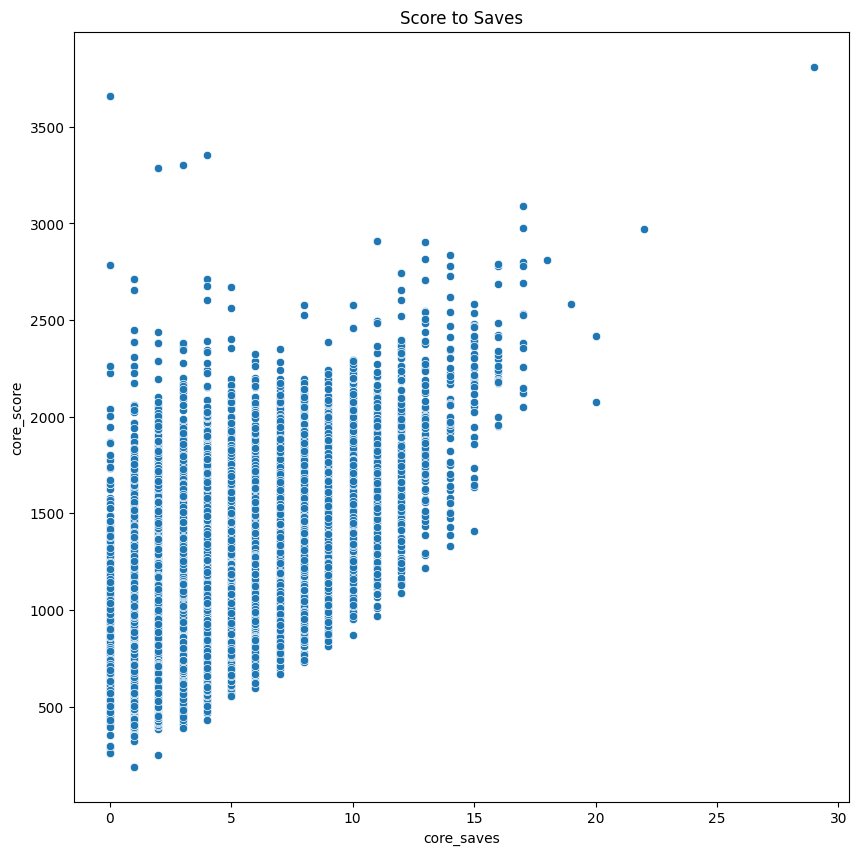

In [41]:
#Setting the figure size
rcParams['figure.figsize'] = 10,10
#making the scatterplot
sns.scatterplot(data=df,
               y='core_score',
               x= 'core_saves')
plt.title("Score to Saves")

Text(0.5, 1.0, 'Score to Assists')

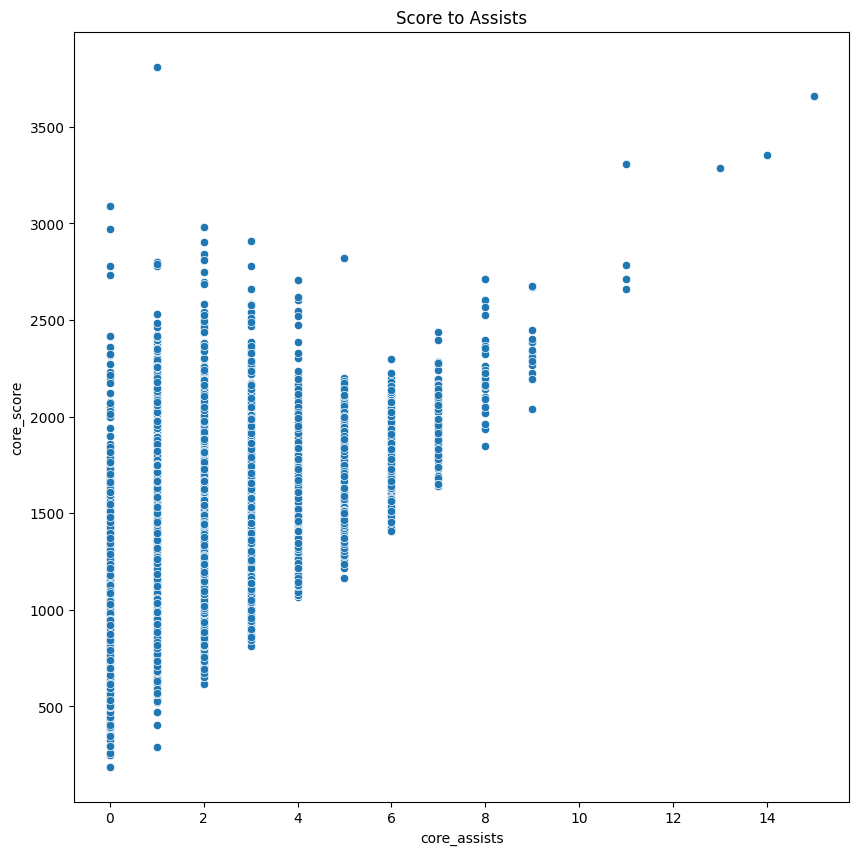

In [42]:
#Setting the figure size
rcParams['figure.figsize'] = 10,10
#making the scatterplot
sns.scatterplot(data=df,
               y='core_score',
               x= 'core_assists')
plt.title("Score to Assists")

Text(0.5, 1.0, 'Shots to Goals')

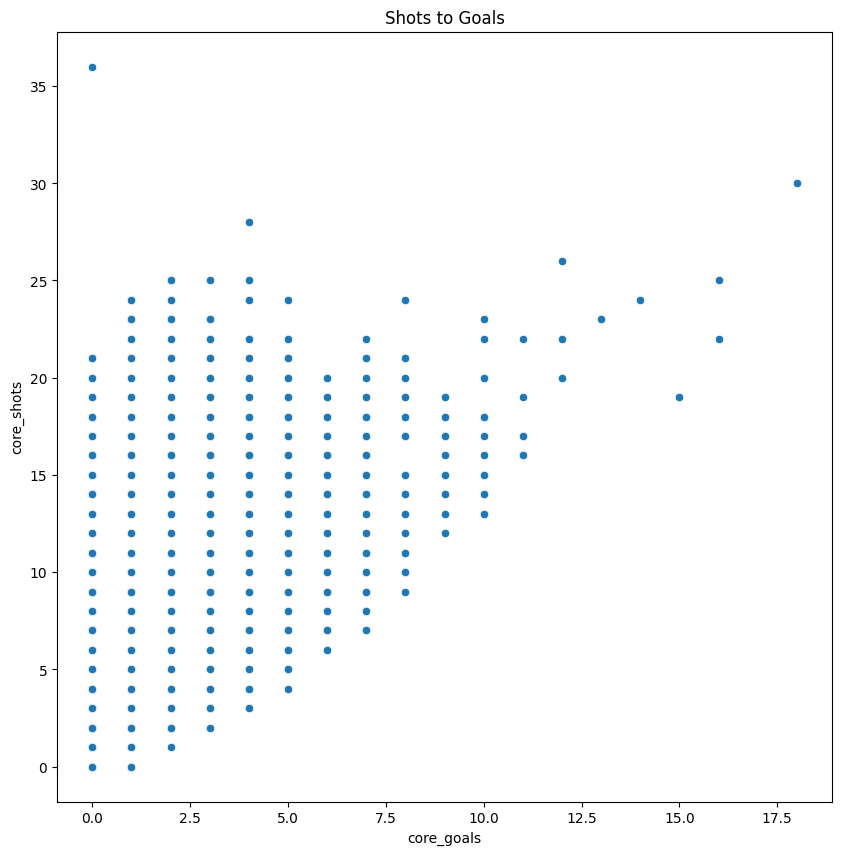

In [44]:
#Setting the figure size
rcParams['figure.figsize'] = 10,10
#making the scatterplot
sns.scatterplot(data=df,
               y='core_shots',
               x= 'core_goals')
plt.title("Shots to Goals")

>This scatterplot shows that the more shots on net the more likely the team is to score a goal.

## <span style="color:red">Baseline Model for KNN.</span>

In [27]:
df['winner'].value_counts(normalize=True)

winner
True     0.5
False    0.5
Name: proportion, dtype: float64

The model needs to have a better accuracy score than 50%.

In [28]:
df.head()

,color,team_name,team_region,core_shots,core_goals,core_saves,core_assists,core_score,core_shooting_percentage,winner
0,blue,GROUND ZERO GAMING,Oceania,13,2,3,1,921,15.384615,True
1,orange,RANGA ROUNDUP,Oceania,4,1,10,0,1068,25.000000,False
2,blue,GROUND ZERO GAMING,Oceania,10,4,3,3,1283,40.000000,True
3,orange,RANGA ROUNDUP,Oceania,6,2,5,1,1023,33.333333,False
4,blue,GROUND ZERO GAMING,Oceania,11,3,2,3,1201,27.272727,True


## <span style="color:red">Fitting the Model.</span>

In [29]:
X=df.drop(columns= ['color','team_name','team_region','winner']).values
y=df['winner']

In [30]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X , y , random_state = 42, stratify=y)

In [31]:
sc = StandardScaler()

In [32]:
#Fit and Transform the Training set.
X_Train_sc=sc.fit_transform(X_Train)
#Transform the Test set
X_Test_sc=sc.transform(X_Test)

In [33]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_Train_sc,y_Train)

KNeighborsClassifier(n_neighbors=19)

## <span style="color:red">Modeling.</span>

In [34]:
knn.score(X_Train_sc,y_Train)

0.8094025098333021

In [35]:
knn.score(X_Test_sc,y_Test)

0.7963816159119003

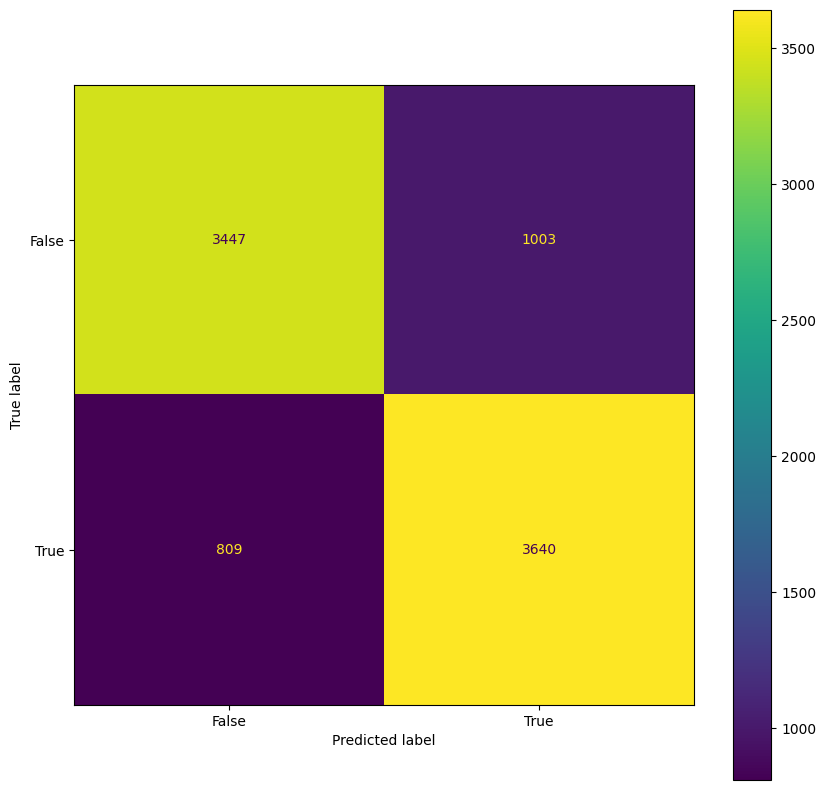

In [36]:
ConfusionMatrixDisplay.from_estimator(knn,X_Test_sc,y_Test)

In [37]:
Scores = []
for k in range(3,30,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train_sc,y_Train)
    Train_Score=knn.score(X_Train_sc,y_Train)
    Test_Score=knn.score(X_Test_sc,y_Test)

    Scores.append({'k':k,'Train_Score':Train_Score,'Test_Score':Test_Score,'RMSE': math.sqrt(mean_squared_error(y_Train, knn.predict(X_Train)))})
Scores = pd.DataFrame(Scores)
print(Scores)

     k  Train_Score  Test_Score      RMSE
0    3     0.864956    0.764243  0.707094
1    5     0.839296    0.773458  0.707094
2    7     0.828095    0.780312  0.707094
3    9     0.820453    0.784358  0.707094
4   11     0.816258    0.789864  0.707094
5   13     0.813935    0.790314  0.707094
6   15     0.812512    0.792673  0.707094
7   17     0.811163    0.793235  0.707094
8   19     0.809403    0.796382  0.707094
9   21     0.808054    0.794696  0.707094
10  23     0.807155    0.796719  0.707094
11  25     0.806743    0.798966  0.707094
12  27     0.805731    0.797505  0.707094
13  29     0.805394    0.796719  0.707094
